# Betting Strategy


The assumptions are:
1. Teams in the middle of the scoreboard tend to draw often
2. Draw odds are usually high (more than 3)

First of all let's see from the data if the assumptions are totally wrong or not

In [1]:
from pathlib import Path
import pandas as pd

DATA = Path("data/processed")

leaderboards = []
seasons = []

for file in DATA.glob("*.csv"):
    if file.name.startswith("leaderboard_"):
        leaderboards.append(file)
    elif file.name.startswith("season_"):
        seasons.append(file)

assert len(leaderboards) == len(seasons)

leaderboards.sort()
seasons.sort()


l_dfs = []
s_dfs = []

for l, s in zip(leaderboards, seasons):
    l_dfs.append(pd.read_csv(l))
    s_dfs.append(pd.read_csv(s))
    print(f"Loaded {l.name} and {s.name}")
    assert l.name[12:] == s.name[7:], f"File names do not match: {l.name} and {s.name}"


Loaded leaderboard_2008-09.csv and season_2008-09.csv
Loaded leaderboard_2009-10.csv and season_2009-10.csv
Loaded leaderboard_2010-11.csv and season_2010-11.csv
Loaded leaderboard_2011-12.csv and season_2011-12.csv
Loaded leaderboard_2012-13.csv and season_2012-13.csv
Loaded leaderboard_2013-14.csv and season_2013-14.csv
Loaded leaderboard_2014-15.csv and season_2014-15.csv
Loaded leaderboard_2015-16.csv and season_2015-16.csv
Loaded leaderboard_2016-17.csv and season_2016-17.csv
Loaded leaderboard_2017-18.csv and season_2017-18.csv
Loaded leaderboard_2018-19.csv and season_2018-19.csv
Loaded leaderboard_2019-20.csv and season_2019-20.csv
Loaded leaderboard_2020-21.csv and season_2020-21.csv
Loaded leaderboard_2021-22.csv and season_2021-22.csv
Loaded leaderboard_2022-23.csv and season_2022-23.csv
Loaded leaderboard_2023-24.csv and season_2023-24.csv
Loaded leaderboard_2024-25.csv and season_2024-25.csv


# Assumption 1: teams at the middle of the scoreboard tend to draw (more) often

In [2]:
def get_draws(season):
    "Get the draws for each team in the season"
    season_draws = season[season["FTR"] == "D"][["HomeTeam", "AwayTeam"]]

    draws = {}

    for _, row in season_draws.iterrows():
        home_team = row["HomeTeam"]
        away_team = row["AwayTeam"]

        if home_team not in draws:
            draws[home_team] = 0
        if away_team not in draws:
            draws[away_team] = 0

        draws[home_team] += 1
        draws[away_team] += 1

    draws_df = pd.DataFrame.from_dict(draws, orient="index", columns=["Draws"])
    draws_df.index.name = "Team"
    draws_df = draws_df.sort_values(by="Draws", ascending=False)
    draws_df.reset_index(inplace=True)

    return draws_df


draws_dfs = [get_draws(s) for s in s_dfs]

merge = lambda x, y: pd.merge(x, y, on="Team", how="left")
draws_leaderboards = [merge(l, d) for l, d in zip(l_dfs, draws_dfs)]

draws_leaderboards[0]


,Team,Points,Draws
0,Inter,84,9
1,Milan,74,8
2,Juventus,74,11
3,Fiorentina,68,5
4,Genoa,68,11
5,Roma,63,9
6,Udinese,58,10
7,Palermo,57,6
8,Cagliari,53,8
9,Lazio,50,5


In [7]:
for d in draws_leaderboards:
    print(d)
    print("*"*35)

          Team  Points  Draws
0        Inter      84      9
1        Milan      74      8
2     Juventus      74     11
3   Fiorentina      68      5
4        Genoa      68     11
5         Roma      63      9
6      Udinese      58     10
7      Palermo      57      6
8     Cagliari      53      8
9        Lazio      50      5
10    Atalanta      47      8
11      Napoli      46     10
12   Sampdoria      46     13
13       Siena      44      8
14     Catania      43      7
15      Chievo      38     14
16     Bologna      37     10
17      Torino      34     10
18     Reggina      31     13
19       Lecce      30     15
***********************************
          Team  Points  Draws
0        Inter      82     10
1         Roma      80      8
2        Milan      70     10
3    Sampdoria      67     10
4      Palermo      65     11
5       Napoli      59     14
6     Juventus      55      7
7        Parma      52     10
8        Genoa      51      9
9         Bari      50     11
10  

In [9]:
import matplotlib.pyplot as plt

def plot_draws(draws_df, ax):
    "Plot the draws for each team in the season"
    draws_df.plot(kind="bar", x="Team", y="Draws", ax=ax, legend=False)
    ax.set_title("Number of Draws")
    ax.set_ylabel("Draws")
    ax.set_xlabel("Team")
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    ax.grid(axis='y')  # Add grid lines for better visibility of values

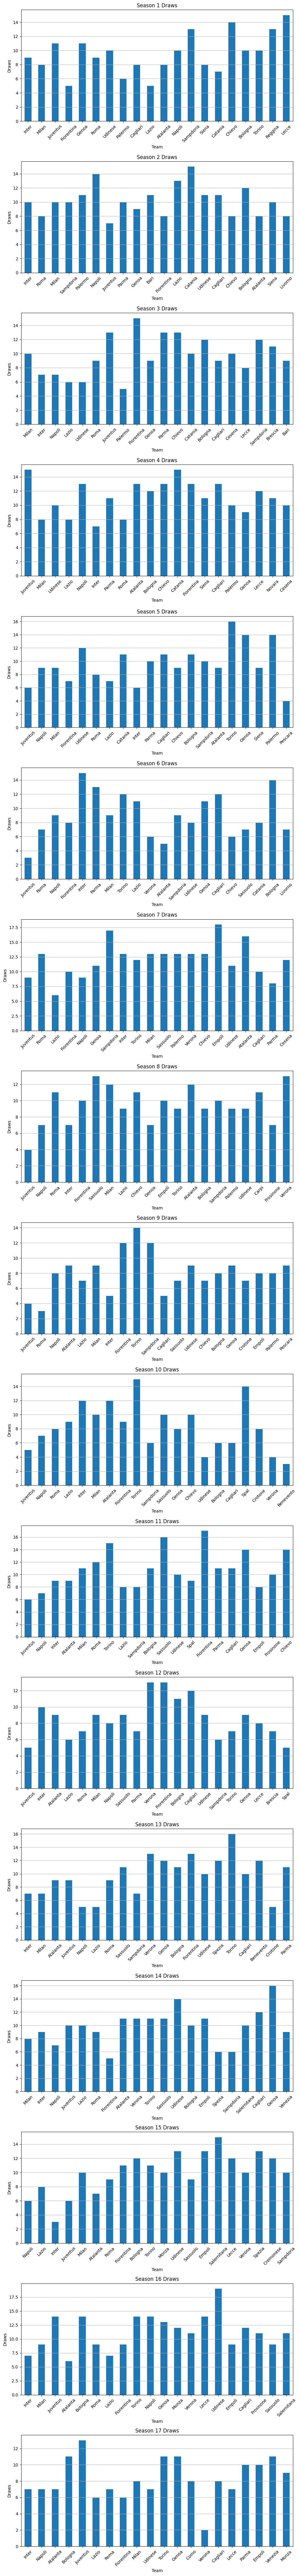

In [10]:
# Plotting the draws for each season
fig, axes = plt.subplots(nrows=len(draws_leaderboards), ncols=1, figsize=(10, 5 * len(draws_leaderboards)))
for i, draws_df in enumerate(draws_leaderboards):
    plot_draws(draws_df, axes[i])
    axes[i].set_title(f"Season {i + 1} Draws")
plt.tight_layout()
plt.show()